In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
import librosa
import librosa.display
from torch.utils.data import sampler
import torch.optim as optim
import json
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from torchinfo import summary
from tqdm import tqdm
import os

In [30]:
def getID(filename):
    file=filename.split('.')[0]
    id=file.split('_')[-1]
    return id

In [31]:
def measure_ERLE_old(out,nend):
    nfft_len=1023
    stft_out=librosa.stft(out,n_fft=nfft_len, hop_length=nfft_len//4,center=True) 
    stft_nend=librosa.stft(nend,n_fft=nfft_len, hop_length=nfft_len//4,center=True)
    (m,n)=stft_out.shape
    for i in range(0,n):
        E=stft_out[:,i]*stft_out[:,i]
        D=stft_nend[:,i]*stft_nend[:,i]

    return 


def measure_ERLE(out,mic):
    m=np.linalg.norm(mic)
    e=np.linalg.norm(out)
    erle=20*np.log10(m/e)
    return erle

def measure_SDR(out,nend):
    shat=out-nend
    s=np.linalg.norm(nend)
    e=np.linalg.norm(shat)
    erle=20*np.log10(s/e)
    return erle

In [32]:
dataset_path="../measure_erle_nlms/"
mean_erle=[]
id_list=[]
for i , (dirpath, dirname, filename) in tqdm(enumerate(os.walk(dataset_path))):
    substr="echo_cancelled"
    for file in filename:
        filepath = os.path.join( dirpath, file)
        if ( (filepath.endswith('.wav')) and (substr in filepath)):
            id=getID(file)
            id_list.append(id)
            out,_=librosa.load(dataset_path+"echo_cancelled_fileid_"+ id +".wav",sr=8000)
            mic,_=librosa.load(dataset_path+"mic_fileid_"+id+".wav", sr=8000)
            nend,_=librosa.load(dataset_path+"nend_fileid_"+id+".wav", sr=8000)
            echo,_=librosa.load(dataset_path+"echo_fileid_"+id+".wav", sr=8000)
            m=len(out)
            mic=mic[:m]
            nend=nend[:m]
            echo=echo[:m]
            erle=measure_ERLE(out,echo)
            mean_erle.append(erle)         
erle=np.mean(mean_erle)
maxerle=np.max(mean_erle)
print("Mean ERLE:",erle)
print("Max ERLE:",maxerle)

1it [00:00, 26.40it/s]

Mean ERLE: 18.97610056400299
Max ERLE: 35.22974252700806


Text(0.5, 1.0, 'LSTM AEC ERLE')

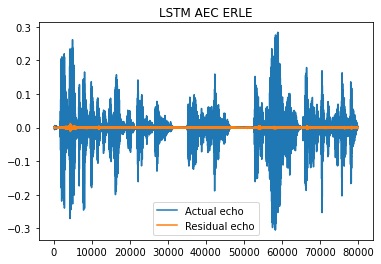

In [33]:
id=str(id_list[np.argmax(mean_erle)])
out,_=librosa.load(dataset_path+"echo_cancelled_fileid_"+ id +".wav",sr=8000)
mic,_=librosa.load(dataset_path+"mic_fileid_"+id+".wav", sr=8000)
nend,_=librosa.load(dataset_path+"nend_fileid_"+id+".wav", sr=8000)
echo,_=librosa.load(dataset_path+"echo_fileid_"+id+".wav", sr=8000)
m=len(out)
mic=mic[:m]
nend=nend[:m]
echo=echo[:m]
plt.figure()
plt.plot(echo)
plt.plot(out)
plt.legend(["Actual echo","Residual echo"])
title="LSTM AEC ERLE"
plt.title(title)
#plt.savefig("../report_figs/"+title+".png")

In [34]:
dataset_path="../measure_sdr_nlms/"
mean_erle=[]
id_list=[]
for i , (dirpath, dirname, filename) in tqdm(enumerate(os.walk(dataset_path))):
    substr="echo_cancelled"
    for file in filename:
        filepath = os.path.join( dirpath, file)
        if ( (filepath.endswith('.wav')) and (substr in filepath)):
            id=getID(file)
            id_list.append(id)
            out,_=librosa.load(dataset_path+"echo_cancelled_fileid_"+ id +".wav",sr=8000)
            mic,_=librosa.load(dataset_path+"mic_fileid_"+id+".wav", sr=8000)
            nend,_=librosa.load(dataset_path+"nend_fileid_"+id+".wav", sr=8000)
            echo,_=librosa.load(dataset_path+"echo_fileid_"+id+".wav", sr=8000)
            m=len(out)
            mic=mic[:m]
            nend=nend[:m]
            echo=echo[:m]
            erle=measure_SDR(out,nend)
            mean_erle.append(erle)         
sdr=np.mean(mean_erle)
maxsdr=np.max(mean_erle)
print("Mean SDR:",sdr)
print("Max SDR:",maxsdr)


1it [00:00, 22.25it/s]

Mean SDR: 1.7447092536152626
Max SDR: 10.906314849853516


Text(0.5, 1.0, 'LSTM AEC SDR')

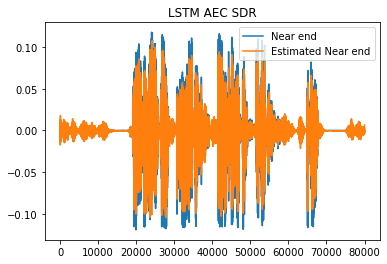

In [28]:
id=str(id_list[np.argmax(mean_erle)])
out,_=librosa.load(dataset_path+"echo_cancelled_fileid_"+ id +".wav",sr=8000)
mic,_=librosa.load(dataset_path+"mic_fileid_"+id+".wav", sr=8000)
nend,_=librosa.load(dataset_path+"nend_fileid_"+id+".wav", sr=8000)
echo,_=librosa.load(dataset_path+"echo_fileid_"+id+".wav", sr=8000)
m=len(out)
mic=mic[:m]
nend=nend[:m]
echo=echo[:m]
plt.figure()
plt.plot(nend)
plt.plot(out)
plt.legend(["Near end","Estimated Near end"])
title="LSTM AEC SDR"
plt.title(title)
#plt.savefig("../report_figs/"+title+".png")